# Multi model


In [50]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

from math import sqrt
from numpy import array, concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat


from pandas import read_csv, DataFrame, concat
from datetime import datetime

In [51]:
import pandas as pd
df = pd.read_csv('Data_processed_RAW.csv', index_col='date', parse_dates=True)
df.head(5)

,1,2,3,4,5,7,8,9,10,11,...,103,104,105,106,107,108,109,110,111,112
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,6.6,16.6,25.8,-4.7,22.1,20.7,5.1,18.7,26.418837,1.7,...,11.1,29.8,5.3,19.1,6.7,21.3,5.2,26.4,26.1,19.257222
2014-01-02,9.3,16.0,25.8,-4.2,25.4,21.8,5.7,19.6,26.418837,3.6,...,8.2,29.9,4.6,19.4,7.6,21.1,5.6,26.2,25.9,19.257222
2014-01-03,7.6,16.7,26.8,-5.5,26.2,17.9,4.1,18.9,18.600000,0.7,...,8.9,29.9,2.8,19.7,9.2,22.7,7.3,26.7,26.1,19.257222
2014-01-04,7.6,18.2,26.1,-5.5,29.3,20.6,7.7,18.7,15.700000,2.5,...,8.0,29.8,2.1,21.1,8.4,27.2,3.7,26.3,26.2,19.257222
2014-01-05,8.6,16.7,26.1,4.9,24.4,23.7,8.0,19.6,16.300000,3.2,...,6.6,29.7,2.5,19.7,6.2,24.0,4.0,26.8,26.1,19.257222


In [52]:
# Preserve the date index
date_index = df.index
# Normalize-------------------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Standardize (Normalize) the DataFrame
normalized_df = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_df, index=date_index, columns=df.columns)
df = normalized_df.copy()

In [53]:
final_df = df.copy()
# Step 3: Generate the next seven dates starting from the last date in the existing DataFrame
last_date = final_df.index[-1]
next_seven_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7, freq='D')

# Step 4: Create an empty DataFrame with these new dates as the index
empty_rows = pd.DataFrame(index=next_seven_days)

# Step 5: Concatenate the original DataFrame with the new empty DataFrame
final_df = pd.concat([final_df, empty_rows])
final_df.head(5)

,1,2,3,4,5,7,8,9,10,11,...,103,104,105,106,107,108,109,110,111,112
2014-01-01,-1.345580,-0.685872,0.055275,-1.294120,0.740595,1.191142,-0.877617,-1.455509,8.525637e-16,-0.680383,...,-0.666464,0.898430,-0.467986,-1.643906,-0.939630,0.898920,-1.071568,0.779630,-0.769178,0.0
2014-01-02,-0.970995,-0.810174,0.055275,-1.232692,1.359235,1.371142,-0.802665,-1.319771,8.525637e-16,-0.471609,...,-0.935610,1.014299,-0.550509,-1.595220,-0.781847,0.859607,-1.032980,0.681892,-0.984000,0.0
2014-01-03,-1.206845,-0.665155,0.517078,-1.392404,1.509208,0.732959,-1.002539,-1.425345,-1.876328e+00,-0.790264,...,-0.870644,1.014299,-0.762713,-1.546535,-0.501345,1.174113,-0.868981,0.926237,-0.769178,0.0
2014-01-04,-1.206845,-0.354397,0.193816,-1.392404,2.090354,1.174778,-0.552822,-1.455509,-2.572257e+00,-0.592478,...,-0.954172,0.898430,-0.845237,-1.319334,-0.641596,2.058662,-1.216273,0.730761,-0.661767,0.0
2014-01-05,-1.068110,-0.665155,0.193816,-0.114704,1.171768,1.682053,-0.515345,-1.319771,-2.428271e+00,-0.515562,...,-1.084104,0.782561,-0.798081,-1.546535,-1.027287,1.429649,-1.187332,0.975107,-0.769178,0.0


In [54]:
df_original=df.copy()
df=df.values
df

array([[-1.34558036, -0.68587164,  0.05527455, ...,  0.77963006,
        -0.76917823,  0.        ],
       [-0.97099508, -0.81017446,  0.05527455, ...,  0.68189179,
        -0.98400016,  0.        ],
       [-1.20684507, -0.6651545 ,  0.51707794, ...,  0.92623746,
        -0.76917823,  0.        ],
       ...,
       [-1.0264892 , -1.36953713,  0.56325828, ...,  1.121714  ,
         0.62716429,  0.86605104],
       [-0.77676567, -1.32810286,  0.88652065, ...,  0.68189179,
         1.59386295,  0.64559612],
       [-0.62415685, -1.22451718,  0.65561896, ...,  1.51266707,
         1.37904103,  0.2598    ]])

In [55]:
n_features = 100
n_steps = 14

In [56]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [57]:
X, y = split_sequences(sequences=df, n_steps=n_steps)
print(X.shape, y.shape)

(1812, 14, 100) (1812, 100)


In [58]:
# define model
model = Sequential()
model.add(LSTM(30, activation='relu', return_sequences=False, input_shape=(n_steps, n_features)))
#model.add(LSTM(100, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

# fit model
history = model.fit(X, y, epochs=3, verbose=1 )
#history = model.fit(X, y, epochs=10, verbose=1 ,validation_data=(X, y))

Epoch 1/3
57/57 [==============================] - 2s 21ms/step - loss: 0.7922
Epoch 2/3
57/57 [==============================] - 1s 20ms/step - loss: 0.4096
Epoch 3/3
57/57 [==============================] - 1s 19ms/step - loss: 0.3495


In [59]:
print("Type of history object:", type(history))
print("Keys available in history object:", history.history.keys())

Type of history object: <class 'keras.callbacks.History'>
Keys available in history object: dict_keys(['loss'])


In [60]:
#min_val_loss = np.min(history.history['val_loss'])
#epoch_min_val_loss = np.argmin(history.history['val_loss']) + 1  # +1 because epochs start from 1
#print(min_val_loss,epoch_min_val_loss)

In [61]:
# Double Layer (0.28936246037483215 17)
# Single Layer (0.24206393957138062 40)

# BS = 5 , LSTM50-100

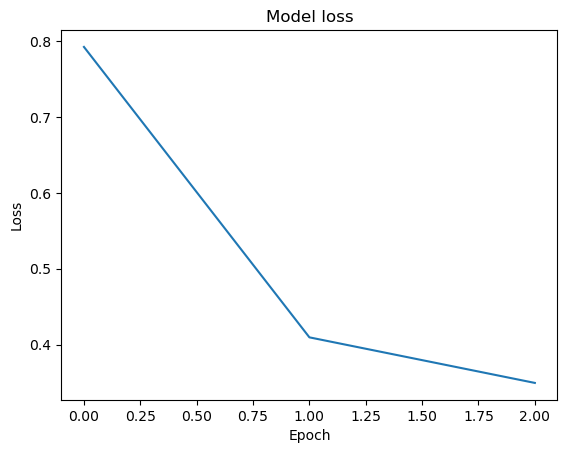

In [62]:
import  matplotlib.pyplot as plt

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [63]:
final_df.head()

,1,2,3,4,5,7,8,9,10,11,...,103,104,105,106,107,108,109,110,111,112
2014-01-01,-1.345580,-0.685872,0.055275,-1.294120,0.740595,1.191142,-0.877617,-1.455509,8.525637e-16,-0.680383,...,-0.666464,0.898430,-0.467986,-1.643906,-0.939630,0.898920,-1.071568,0.779630,-0.769178,0.0
2014-01-02,-0.970995,-0.810174,0.055275,-1.232692,1.359235,1.371142,-0.802665,-1.319771,8.525637e-16,-0.471609,...,-0.935610,1.014299,-0.550509,-1.595220,-0.781847,0.859607,-1.032980,0.681892,-0.984000,0.0
2014-01-03,-1.206845,-0.665155,0.517078,-1.392404,1.509208,0.732959,-1.002539,-1.425345,-1.876328e+00,-0.790264,...,-0.870644,1.014299,-0.762713,-1.546535,-0.501345,1.174113,-0.868981,0.926237,-0.769178,0.0
2014-01-04,-1.206845,-0.354397,0.193816,-1.392404,2.090354,1.174778,-0.552822,-1.455509,-2.572257e+00,-0.592478,...,-0.954172,0.898430,-0.845237,-1.319334,-0.641596,2.058662,-1.216273,0.730761,-0.661767,0.0
2014-01-05,-1.068110,-0.665155,0.193816,-0.114704,1.171768,1.682053,-0.515345,-1.319771,-2.428271e+00,-0.515562,...,-1.084104,0.782561,-0.798081,-1.546535,-1.027287,1.429649,-1.187332,0.975107,-0.769178,0.0


In [64]:
X[0].shape

(14, 100)

In [65]:
for i in range(7):
  # Get the last rows
  last_n_rows = df_original.tail(n_steps).values.tolist()
  last_value = np.array(last_n_rows)
  #Reshape
  x_input = last_value.reshape((1, n_steps, n_features))
  # Predict
  yhat = model.predict(x_input, verbose=0)
  # Add the prediction to the original dataframe
  y_list =yhat.tolist()
  df_original.loc[len(df_original)] = y_list[0]


In [66]:
df_original.tail(10)

,1,2,3,4,5,7,8,9,10,11,...,103,104,105,106,107,108,109,110,111,112
date,,,,,,,,,,,,,,,,,,,,,
2018-12-29 00:00:00,-1.026489,-1.369537,0.563258,-1.527546,0.909315,0.683868,-1.414780,-1.546002,-2.212294,-0.735323,...,-1.037699,0.087346,-0.656611,-1.384249,-0.624065,0.604070,-1.129450,1.121714,0.627164,0.866051
2018-12-30 00:00:00,-0.776766,-1.328103,0.886521,-1.257263,1.621688,0.700231,-1.214905,-1.530920,-2.188296,-0.526550,...,-1.353249,-0.376130,-0.562298,-1.319334,-0.361093,1.606559,-1.158391,0.681892,1.593863,0.645596
2018-12-31 00:00:00,-0.624157,-1.224517,0.655619,-0.483271,1.471715,1.109323,-0.865125,-1.500756,-2.308284,-0.647419,...,-1.483181,-0.607868,-0.338305,-1.221963,0.112255,1.233083,-1.438154,1.512667,1.379041,0.259800
1826,-1.114080,-0.454433,0.260717,-0.378828,0.989459,0.738742,-1.218827,-1.006663,-1.075097,-0.960988,...,-1.229279,-0.230182,-1.507513,-1.465954,-1.000600,0.870384,-0.958825,0.648155,-0.307105,0.411956
1827,-1.069505,-0.571987,0.114437,-0.447172,1.009886,0.679621,-1.429163,-0.970215,-1.135892,-0.742522,...,-1.396253,-0.331433,-1.488723,-1.426190,-0.979208,0.632958,-1.019342,0.562770,-0.184986,0.400618
1828,-1.123996,-0.673912,0.178785,-0.545229,1.055982,0.739976,-1.496021,-1.045893,-1.193792,-0.772883,...,-1.421257,-0.327115,-1.541804,-1.522127,-1.007649,0.688824,-1.093288,0.619849,-0.200984,0.421185
1829,-1.172221,-0.774376,0.241659,-0.624343,1.107212,0.801539,-1.521835,-1.107090,-1.238515,-0.828233,...,-1.436749,-0.321092,-1.611688,-1.609812,-1.035523,0.781322,-1.150789,0.692357,-0.242467,0.448475
1830,-1.225688,-0.867001,0.289267,-0.714041,1.151036,0.872073,-1.524345,-1.158424,-1.271796,-0.878046,...,-1.437526,-0.332320,-1.637196,-1.638569,-1.053380,0.873086,-1.200554,0.772052,-0.255263,0.482475
1831,-1.266489,-0.944262,0.355343,-0.797507,1.176394,0.931836,-1.527434,-1.197339,-1.298655,-0.923832,...,-1.427916,-0.314513,-1.641343,-1.648041,-1.056346,0.957644,-1.244593,0.848184,-0.272132,0.505588


In [67]:
import pandas as pd
        
TS_sub_2 = pd.read_csv('TS_sub_2.csv', sep = ',')
TS_sub_2

,submission_ID,avg_temp_c
0,1,9.792720
1,2,8.958144
2,3,8.549670
3,4,8.203837
4,5,7.726925
...,...,...
695,696,20.686961
696,697,20.904886
697,698,21.061328
698,699,21.208766


In [68]:
date_index = final_df.index
# De-normalize the DataFrame
denormalized_data = scaler.inverse_transform(df_original)

# Create a new DataFrame with de-normalized data and original date index
denormalized_df = pd.DataFrame(denormalized_data, index=date_index, columns=df_original.columns)
denormalized_df

,1,2,3,4,5,7,8,9,10,11,...,103,104,105,106,107,108,109,110,111,112
2014-01-01,6.600000,16.600000,25.800000,-4.700000,22.100000,20.700000,5.100000,18.700000,26.418837,1.700000,...,11.100000,29.800000,5.300000,19.100000,6.700000,21.300000,5.200000,26.400000,26.100000,19.257222
2014-01-02,9.300000,16.000000,25.800000,-4.200000,25.400000,21.800000,5.700000,19.600000,26.418837,3.600000,...,8.200000,29.900000,4.600000,19.400000,7.600000,21.100000,5.600000,26.200000,25.900000,19.257222
2014-01-03,7.600000,16.700000,26.800000,-5.500000,26.200000,17.900000,4.100000,18.900000,18.600000,0.700000,...,8.900000,29.900000,2.800000,19.700000,9.200000,22.700000,7.300000,26.700000,26.100000,19.257222
2014-01-04,7.600000,18.200000,26.100000,-5.500000,29.300000,20.600000,7.700000,18.700000,15.700000,2.500000,...,8.000000,29.800000,2.100000,21.100000,8.400000,27.200000,3.700000,26.300000,26.200000,19.257222
2014-01-05,8.600000,16.700000,26.100000,4.900000,24.400000,23.700000,8.000000,19.600000,16.300000,3.200000,...,6.600000,29.700000,2.500000,19.700000,6.200000,24.000000,4.000000,26.800000,26.100000,19.257222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-03,8.197171,16.657727,26.067452,1.395686,23.782361,17.942882,0.149661,21.415917,21.444194,0.858179,...,2.967224,28.742302,-3.808564,19.850401,6.312017,20.231169,4.974855,26.073042,26.628991,20.785644
2019-01-04,7.849566,16.172797,26.203602,0.751729,24.055638,18.319098,-0.056983,21.010156,21.257829,0.354451,...,2.800302,28.747500,-4.401350,19.310088,6.153024,20.701741,4.378802,26.221414,26.590370,20.884675
2019-01-05,7.464182,15.725703,26.306692,0.021621,24.289407,18.750139,-0.077076,20.669794,21.119141,-0.098886,...,2.791936,28.737810,-4.617721,19.132891,6.051166,21.168572,3.862940,26.384494,26.578457,21.008055
2019-01-06,7.170087,15.352772,26.449775,-0.657760,24.424674,19.115360,-0.101805,20.411771,21.007218,-0.515573,...,2.895479,28.753178,-4.652896,19.074521,6.034248,21.598748,3.406437,26.540280,26.562752,21.091930


In [69]:
denormalized_df.to_csv("TSPred.csv",index = True)

#### Predictions

In [70]:
import pandas as pd
TSPred = pd.read_csv('TSPred.csv')
TSPred

,Unnamed: 0,1,2,3,4,5,7,8,9,10,...,103,104,105,106,107,108,109,110,111,112
0,2014-01-01,6.600000,16.600000,25.800000,-4.700000,22.100000,20.700000,5.100000,18.700000,26.418837,...,11.100000,29.800000,5.300000,19.100000,6.700000,21.300000,5.200000,26.400000,26.100000,19.257222
1,2014-01-02,9.300000,16.000000,25.800000,-4.200000,25.400000,21.800000,5.700000,19.600000,26.418837,...,8.200000,29.900000,4.600000,19.400000,7.600000,21.100000,5.600000,26.200000,25.900000,19.257222
2,2014-01-03,7.600000,16.700000,26.800000,-5.500000,26.200000,17.900000,4.100000,18.900000,18.600000,...,8.900000,29.900000,2.800000,19.700000,9.200000,22.700000,7.300000,26.700000,26.100000,19.257222
3,2014-01-04,7.600000,18.200000,26.100000,-5.500000,29.300000,20.600000,7.700000,18.700000,15.700000,...,8.000000,29.800000,2.100000,21.100000,8.400000,27.200000,3.700000,26.300000,26.200000,19.257222
4,2014-01-05,8.600000,16.700000,26.100000,4.900000,24.400000,23.700000,8.000000,19.600000,16.300000,...,6.600000,29.700000,2.500000,19.700000,6.200000,24.000000,4.000000,26.800000,26.100000,19.257222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,2019-01-03,8.197171,16.657727,26.067452,1.395686,23.782361,17.942882,0.149661,21.415917,21.444194,...,2.967224,28.742302,-3.808564,19.850401,6.312017,20.231169,4.974855,26.073042,26.628991,20.785644
1829,2019-01-04,7.849566,16.172797,26.203602,0.751729,24.055638,18.319098,-0.056983,21.010156,21.257829,...,2.800302,28.747500,-4.401350,19.310088,6.153024,20.701741,4.378802,26.221414,26.590370,20.884675
1830,2019-01-05,7.464182,15.725703,26.306692,0.021621,24.289407,18.750139,-0.077076,20.669794,21.119141,...,2.791936,28.737810,-4.617721,19.132891,6.051166,21.168572,3.862940,26.384494,26.578457,21.008055
1831,2019-01-06,7.170087,15.352772,26.449775,-0.657760,24.424674,19.115360,-0.101805,20.411771,21.007218,...,2.895479,28.753178,-4.652896,19.074521,6.034248,21.598748,3.406437,26.540280,26.562752,21.091930


<Axes: >

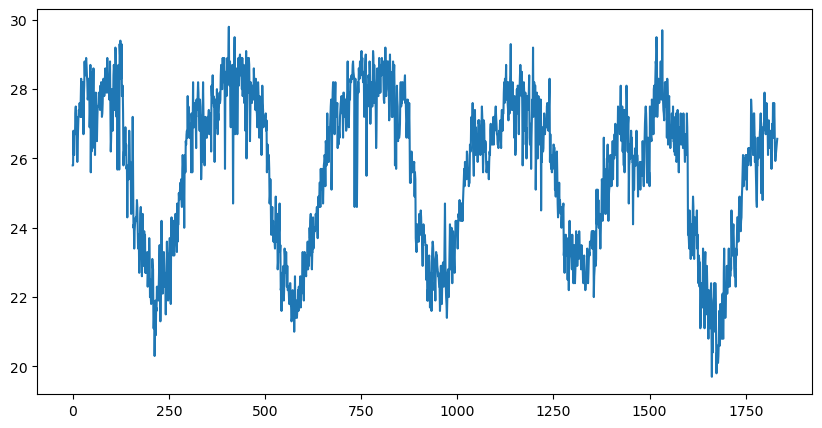

In [71]:
TSPred['3'].plot(figsize=(10,5))

In [72]:
import numpy as np
import pandas as pd
submission_key = pd.read_csv('DataSet/submission_key.csv', sep = ',')
submission_key['city_id'] = submission_key['city_id'].str[1:]
submission_key['city_id'] = submission_key['city_id'].astype(int)
submission_key['avg_temp_c'] = np.nan

In [73]:
# Iterate through each cell value
for i in range(len(submission_key)):
    city_id =  submission_key['city_id'].loc[i]
    date =  submission_key['date'].loc[i]
    row_index = TSPred.index[TSPred['Unnamed: 0'] == date]
    submission_key.at[i,'avg_temp_c'] = TSPred[str(city_id)].loc[row_index[0]]

submission_key =submission_key.drop(columns = ['city_id','date'])
submission_key.to_csv("TS_sub_2.csv",index = False)

In [74]:
submission_key

,submission_ID,avg_temp_c
0,1,8.268648
1,2,8.589946
2,3,8.197171
3,4,7.849566
4,5,7.464182
...,...,...
695,696,20.785644
696,697,20.884675
697,698,21.008055
698,699,21.091930
